Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ x ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ x ] Begin with baselines for classification.
- [ x ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.



In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

## 1 done
- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.

### pre-vis

In [32]:
df.sample()

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
139,California,6/3/2016,NaN,NaN,NaN,6.25,2.5,NaN,NaN,18.5,22.5,0.75,3.0,4.0,3.0,2.0,1.5,1.0,3.0,1.5,3.0,NaN,NaN,x,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,False


In [33]:
df.dtypes

Burrito            object
Date               object
Yelp              float64
Google            float64
Chips              object
Cost              float64
Hunger            float64
Mass (g)          float64
Density (g/mL)    float64
Length            float64
Circum            float64
Volume            float64
Tortilla          float64
Temp              float64
Meat              float64
Fillings          float64
Meat:filling      float64
Uniformity        float64
Salsa             float64
Synergy           float64
Wrap              float64
Unreliable         object
NonSD              object
Beef               object
Pico               object
Guac               object
Cheese             object
Fries              object
Sour cream         object
Pork               object
Chicken            object
Shrimp             object
Fish               object
Rice               object
Beans              object
Lettuce            object
Tomato             object
Bell peper         object
Carrots     

### pre-vis over

In [0]:
df['Date'] = pd.to_datetime(df['Date'])


In [0]:
df = df.set_index(df['Date'])
df = df.sort_index()

In [36]:
df.sample(5)

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-30,Other,2016-08-30,NaN,NaN,NaN,7.50,3.0,NaN,NaN,17.0,21.0,0.60,2.5,2.5,3.0,2.0,2.0,1.0,5.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,x,NaN,x,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-06-24,Surf & Turf,2017-06-24,NaN,NaN,NaN,8.55,3.0,610.0,0.72619,20.0,23.0,0.84,3.0,2.5,3.0,3.0,3.5,2.8,3.5,2.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-05-24,Asada,2016-05-24,3.5,3.9,NaN,6.50,2.0,NaN,NaN,18.5,21.5,0.68,1.5,4.0,2.0,2.0,4.5,1.0,1.0,2.0,5.0,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-02-24,Other,2016-02-24,4.0,4.4,NaN,8.75,3.5,NaN,NaN,NaN,NaN,NaN,1.5,2.0,3.0,3.5,4.0,1.0,3.5,4.5,4.0,NaN,NaN,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2016-05-12,Other,2016-05-12,NaN,NaN,NaN,8.75,3.0,NaN,NaN,19.0,21.5,0.70,3.0,4.0,2.7,4.7,3.0,2.4,2.0,3.7,4.5,NaN,NaN,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [42]:
train_2016 = df['2016-01-01':'2016-12-30']
validate_2017 = df['2017-01-01':'2017-12-30']
test_2018 = df['2018-01-01':'2020-12-30']
train_2016.shape, validate_2017.shape, test_2018.shape

((296, 59), (85, 59), (37, 59))

## 2 - done
- [ ] Begin with baselines for classification.

In [47]:
target = 'Great'
y_train = train_2016[target]
y_train.value_counts(normalize=True)

False    0.591216
True     0.408784
Name: Great, dtype: float64

In [0]:
majority_class = y_train.mode()[0]


In [58]:
y_val = validate_2017[target]
y_pred = [majority_class]*len(validate_2017)
accuracy_score(y_val, y_pred)

0.5529411764705883

In [50]:
from sklearn.metrics import accuracy_score, mean_absolute_error

accuracy_score(y_train, y_train_pred)

0.5912162162162162

## 3 - started
- [ x ] Use scikit-learn for logistic regression.

In [52]:
# 1. Import estimator class
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
linear_reg = LinearRegression()

# 3. Arrange X feature matrices (already did y target vectors)
features = ['Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap']
X_train = train_2016[features]
X_val = validate_2017[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 4. Fit the model
linear_reg.fit(X_train_imputed, y_train)

# 5. Apply the model to new data.
# The predictions look like this ...
linear_reg.predict(X_val_imputed)

array([ 0.45316681,  0.48624388,  0.57174377,  0.52203398, -0.06455015,
        0.58981521,  0.82725949, -0.065376  ,  0.2204496 ,  0.73756497,
        0.75542915, -0.0356006 ,  0.30765836,  1.02533938,  0.32099852,
        0.42064795,  0.40257414,  0.62862816,  0.65676101,  1.07554694,
        0.61241159,  0.47221764,  0.13006818,  0.51467428,  0.68322589,
        0.67962329,  0.53554339,  0.43431316,  0.64294659,  0.92547495,
        0.75380461,  0.43818311,  0.34691337,  0.42818861,  0.39245766,
        0.28977072,  0.5939887 ,  0.47299553,  0.46978429,  0.37852705,
        0.34714083,  0.46018735,  0.49505207,  0.64035556,  0.62389254,
        0.52032366, -0.03230356, -0.23678266,  0.15005337,  0.53927924,
        0.44061142,  0.18279172,  0.82026033,  0.72407477,  0.42432597,
        0.11196587,  0.23878003,  0.41722827,  0.26662913, -0.47150623,
        0.39083456, -0.10824521,  0.32999207,  0.4345894 ,  0.43360892,
        0.73960413,  0.52023886,  1.06962384,  0.51602037,  0.40

In [53]:
pd.Series(linear_reg.coef_, features)

Volume          0.037205
Tortilla        0.053848
Temp            0.049837
Meat            0.105328
Fillings        0.108306
Meat:filling    0.062541
Uniformity      0.011048
Salsa           0.044863
Synergy         0.126936
Wrap            0.002456
dtype: float64

In [54]:
df.sample(4)

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-03,Other,2016-03-03,NaN,NaN,NaN,6.49,4.5,NaN,NaN,NaN,NaN,NaN,3.0,4.5,3.5,3.5,3.5,3.0,3.0,3.0,4.0,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-06-11,Asada,2016-06-11,4.0,4.1,x,7.85,3.0,NaN,NaN,16.5,20.5,0.55,3.0,4.5,4.5,3.5,3.5,3.5,1.0,4.0,1.0,NaN,x,X,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2016-06-23,California,2016-06-23,NaN,NaN,NaN,7.00,2.2,NaN,NaN,18.0,25.0,0.90,2.8,3.0,3.0,2.0,2.0,4.5,2.0,1.5,4.5,NaN,NaN,x,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2018-04-21,California,2018-04-21,3.5,3.8,No,8.50,3.2,NaN,NaN,18.0,23.0,0.76,3.8,4.0,4.0,4.0,3.8,3.4,4.3,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [55]:
test_case = [[0.90, 3, 5, 2, 5, 5, 4, 4, 1, 5]]  # 1st class, 5-year old, Rich
linear_reg.predict(test_case)

array([0.25968857])

# 4.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, y_train)

#print('Validation Accuracy', log_reg.score(X_val_imputed, y_val))
y_pred = log_reg.predict(X_val_imputed)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.8470588235294118


In [60]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
encoder = ce.one_hot.OneHotEncoder(use_cat_names=True)
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.transform(X_val)

In [0]:
imputer = SimpleImputer()
X_train_imp = imputer.fit_transform(X_train_enc)
X_val_imp = imputer.transform(X_val_enc)

In [0]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_imp)
X_val_sc = scaler.transform(X_val_imp)

In [0]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_enc.columns)
X_val_sc = pd.DataFrame(X_val_sc, columns=X_val_enc.columns)

In [65]:
model = LogisticRegressionCV()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_val_sc)
print(f'Validation accuracy: {accuracy_score(y_val, y_pred)}')

Validation accuracy: 0.8823529411764706


In [67]:
coefs = model.coef_[0]
coefs = pd.Series(coefs, X_train_sc.columns)
coefs

Volume          0.026233
Tortilla        0.312630
Temp            0.282644
Meat            0.588569
Fillings        0.606374
Meat:filling    0.484667
Uniformity      0.147684
Salsa           0.270587
Synergy         0.687662
Wrap            0.079362
dtype: float64

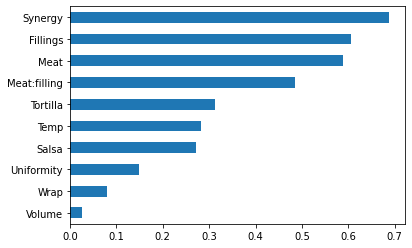

In [68]:
coefs.sort_values().plot.barh()

In [0]:
X_test = test_2018[features]
X_test_enc = encoder.transform(X_test)
X_test_imp = imputer.transform(X_test_enc)
X_test_sc = scaler.transform(X_test_imp)

In [0]:
y_pred = model.predict(X_test_sc)


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).